In [1]:
import pandas as pd
import seaborn as sns; sns.set
import matplotlib.pyplot as plt #Library responsável pelos gráfiocos
import datetime as dt
import matplotlib
matplotlib.rcParams['figure.figsize' ]= [36,16]

In [2]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'],dayfirst=True)
    df.set_index('data',inplace=True)
    return df


In [4]:
ipca = consulta_bc(433) #índice nacional de preços ao consumidor IBGE
ipca_12 = consulta_bc(13522) # índice nacional de preços ao consumidor - amnplo (IPCA) - em 12 meses IBGE
selic = consulta_bc(1178) # Taxa de juros - Selic anualizada base 252
Selic_meta = consulta_bc(432) # Taxa de juros = Meta Selic definida pelo Copom
cdi = consulta_bc(4389) # Taxa de juros - CDI anualizada base 252
cdi_dia = consulta_bc(12) # Taxa de juros - CDI % a. d.
cdi_acum_mes = consulta_bc(4391) # Taxa de juros - CDI acumulada no mês % a.m
cdi_acum_mes_anu = consulta_bc(4392) # Taxa de juros - CDI acmulado no mês anualizada base 252

ValueError: Expected object or value

In [3]:
ipca_alim = consulta_bc(1635)

ValueError: Expected object or value

In [6]:
ipca["valor"].describe()[2]

10.86994879881006

In [26]:
selic[selic.index == '2025-01-01']

,valor
data,


In [27]:
selic[selic.index == '2025-01-01']

,valor
data,


In [17]:
selic['Fator acumulação'] = [(1 + valor/100) ** (1/252) for valor in selic['valor'].values]

In [28]:
selic[selic.index == '2025-01-01']

,valor
data,


In [19]:
selic

,valor,Fator acumulação
data,,
1986-06-04,17.80,1.000650
1986-06-05,18.50,1.000674
1986-06-06,18.31,1.000667
1986-06-09,18.76,1.000683
1986-06-10,18.40,1.000670
...,...,...
2022-11-01,13.65,1.000508
2022-11-03,13.65,1.000508
2022-11-04,13.65,1.000508


In [20]:
selic['VNA']= 0



In [21]:
print(len(selic))

9132


In [22]:
for i in range(len(selic)):
    if selic.index[i] == dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = 100
        
    elif selic.index[i] > dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1] * selic['Fator acumulação'].iloc[i-1]

C:\Users\edson\AppData\Local\Temp\ipykernel_37732\2262691709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = 100
C:\Users\edson\AppData\Local\Temp\ipykernel_37732\2262691709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1] * selic['Fator acumulação'].iloc[i-1]


In [23]:
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2022-05-01,0.47
2022-06-01,0.67
2022-07-01,-0.68


In [13]:
selic

,valor,Fator acumulação,VNA
data,,,
1986-06-04,17.80,1.000650,0.000000
1986-06-05,18.50,1.000674,0.000000
1986-06-06,18.31,1.000667,0.000000
1986-06-09,18.76,1.000683,0.000000
1986-06-10,18.40,1.000670,0.000000
...,...,...,...
2022-10-26,13.65,1.000508,1233.750027
2022-10-27,13.65,1.000508,1234.376624
2022-10-28,13.65,1.000508,1235.003540


In [17]:
list_didia = []
for i in range(len(cdi)):
    list_didia.append(100*((1+cdi['valor'][1]/100)**(1/252)-1))
cdi_dia = cdi.copy(deep=True)
cdi_dia['tx_dia'] = list_didia


In [19]:
cdi_dia

,valor,tx_dia
data,,
1986-03-06,18.72,0.06902
1986-03-10,18.99,0.06902
1986-03-12,18.51,0.06902
1986-03-14,17.67,0.06902
1986-03-17,18.75,0.06902
...,...,...
2022-10-26,13.65,0.06902
2022-10-27,13.65,0.06902
2022-10-28,13.65,0.06902


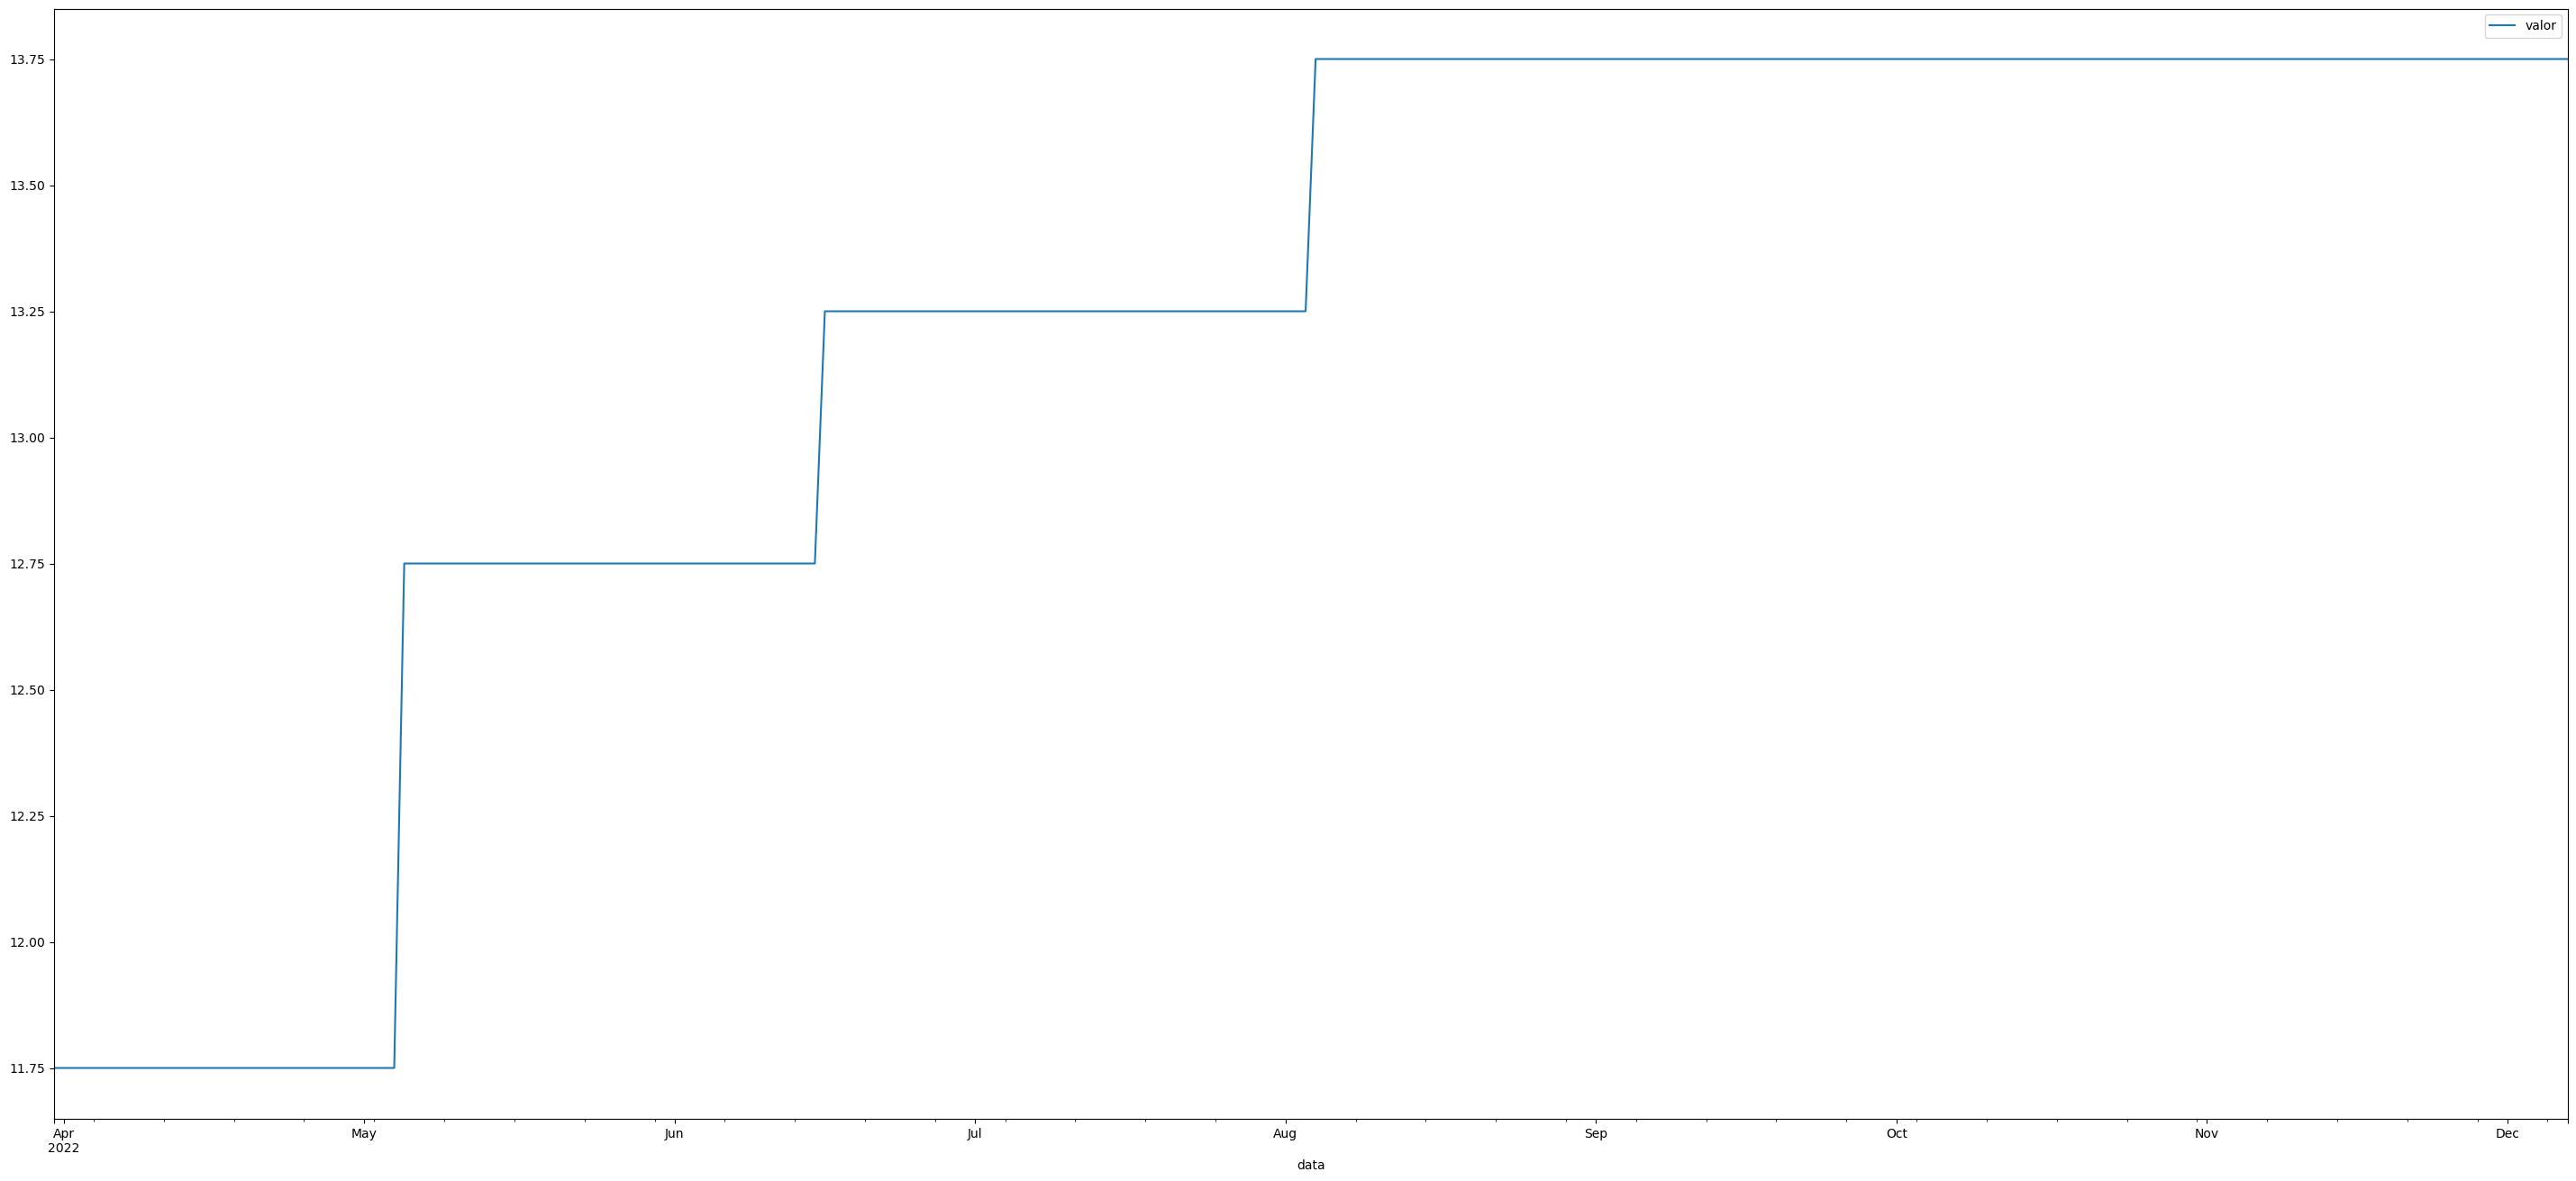

In [27]:
Selic_meta[-252:].plot();

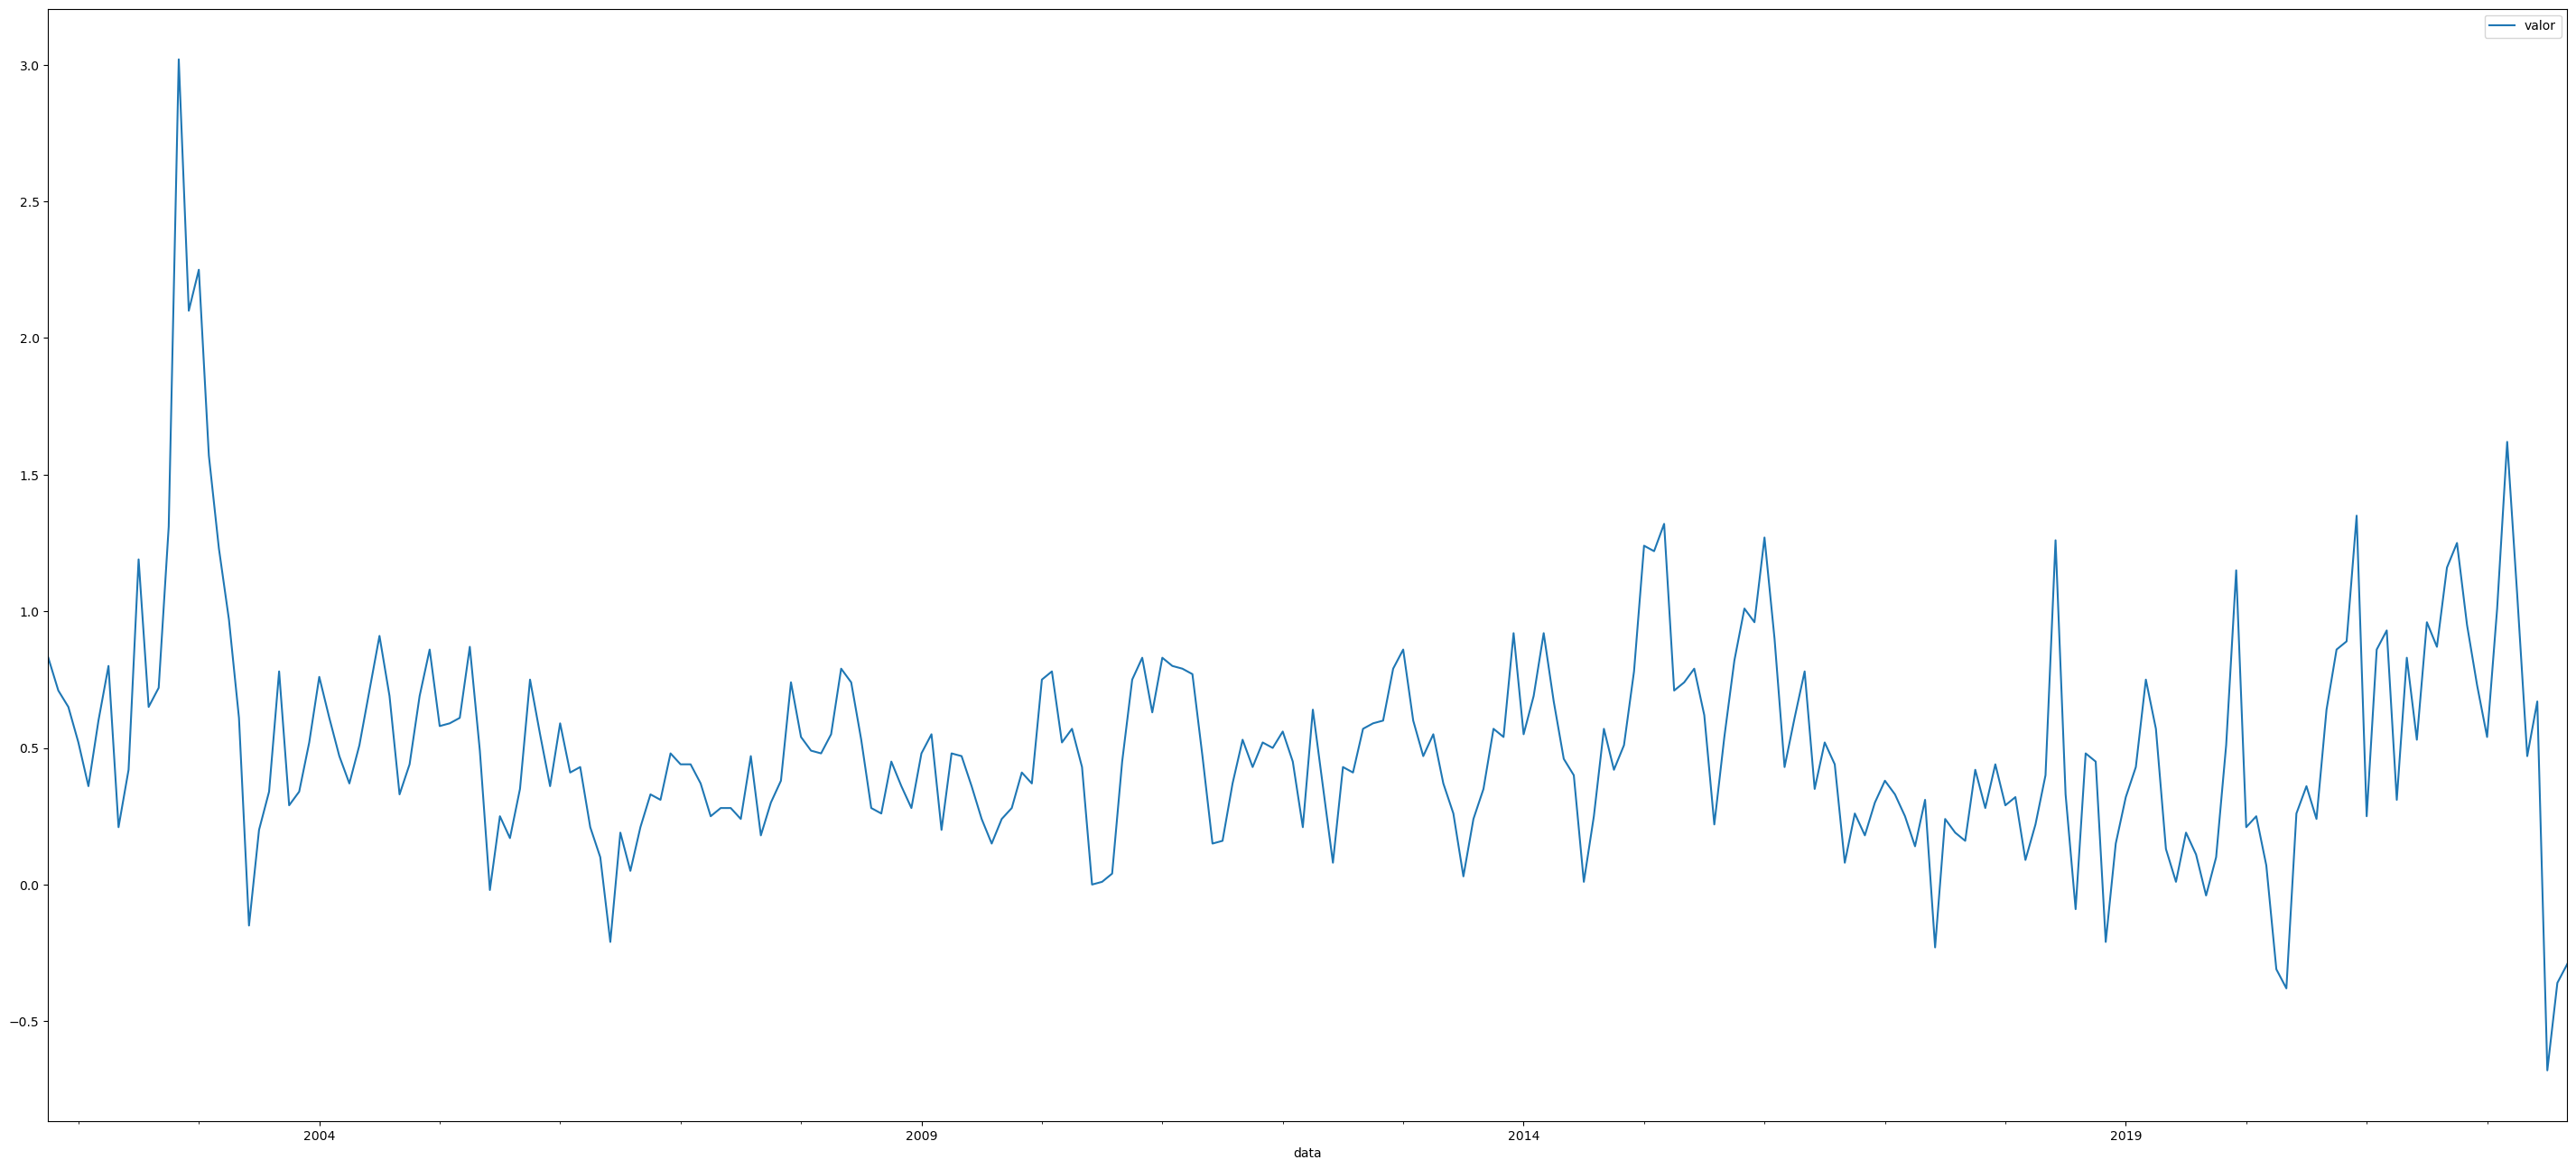

In [32]:
ipca[-252:].plot();

In [33]:
import sidrapy

In [37]:
data = sidrapy.get_table(table_code='1737', territorial_level=1, ibge_territorial_code='all', period="last 200")
data2 = data[['V','D2N','D3N']]
data2 = data2[data2['D3N']==data['D3N'][1]]
data2

,V,D2N,D3N
1,2560.8200000000000,fevereiro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
7,2571.8300000000000,março 2006,IPCA - Número-índice (base: dezembro de 1993 =...
13,2577.2300000000000,abril 2006,IPCA - Número-índice (base: dezembro de 1993 =...
19,2579.8100000000000,maio 2006,IPCA - Número-índice (base: dezembro de 1993 =...
25,2574.3900000000000,junho 2006,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...
1171,6412.8800000000000,maio 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1177,6455.8500000000000,junho 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1183,6411.9500000000000,julho 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1189,6388.8700000000000,agosto 2022,IPCA - Número-índice (base: dezembro de 1993 =...
